#### Data Source 

The dataset utilized in this project is an open-source CSV file obtained from Kaggle, a well-known platform for data science and machine learning datasets. It was collected to support the analysis and prediction of used car prices and is publicly available at: https://www.kaggle.com/datasets/ayaz11/used-car-price-prediction/data. This dataset provides comprehensive information relevant to the used car market, making it a valuable resource for developing predictive models and conducting data-driven research in the automotive industry.

#### Project Objectives : 

#### Packages : 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin
import warnings
warnings.filterwarnings('ignore')
import math
import joblib

In [4]:
pip show scikit-learn

Name: scikit-learn
Version: 1.4.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: Note: you may need to restart the kernel to use updated packages.
License: new BSD

Location: C:\Users\User\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn, mlxtend, shap, yellowbrick

#### Reading in the data 

In [12]:
used_car_df = pd.read_csv("Used_Car_DataSet.csv")

In [13]:
used_car_df.head(20)

,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age
0,0,2016,Honda,Honda Brio S MT,Brio,425000.0,9680.0,Petrol,Mumbai,7,5.0
1,1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,325000.0,119120.0,Diesel,Mumbai,11,9.0
2,2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,2650000.0,64593.0,Diesel,Thane,1,4.0
3,3,2017,Mercedes-Benz,Mercedes-Benz E-Class E 220d Expression [2019-...,E-Class,4195000.0,25000.0,Diesel,Mumbai,2,4.0
4,4,2012,Hyundai,Hyundai Verna Fluidic 1.6 CRDi SX,Verna,475000.0,23800.0,Diesel,Mumbai,14,9.0
5,5,2012,Hyundai,Hyundai i20 Sportz 1.2 BS-IV,i20,335000.0,45000.0,Petrol,Mumbai,14,9.0
6,6,2019,Toyota,Toyota Glanza V,Glanza,750000.0,19500.0,Petrol,Mumbai,1,2.0
7,7,2018,Mercedes-Benz,Mercedes-Benz GLE 250 d,GLE,5500000.0,32000.0,Diesel,Mumbai,2,3.0
8,8,2017,Hyundai,Hyundai Grand i10 Sportz (O) AT 1.2 Kappa VTVT...,Grand,565000.0,44329.0,Petrol,Mumbai,14,4.0
9,9,2015,Maruti Suzuki,Maruti Suzuki Swift Dzire ZXI,Swift,510000.0,48286.0,Petrol,Mumbai,32,6.0


#### META DATA

The data provided consists of the following Data Dictionary
-  Id: Unique ID assigned to a specific car.
-  Year: Manufacture year of the car.
-  Brand: Brand of the car.
-  Full_model_name: Model name includes other details such as engine capacity,
transmission, etc., basically a detailed model name.
-  Model_name: Just the model name of the car.
-  Price: Sell price of the 2nd ownership car.
-  Distance_travelled(km): Distance traveled by car.
-  Fuel_type : Fuel engine type .
-  City: City where the car is registered.
-  Car_age: Age of the car.

#### A. Data Wrangling :

Data wrangling, also known as data preprocessing, is the process of cleaning and organizing raw data into a structured format for analysis. In this section, we focus on essential initial steps such as identifying missing values, checking for and removing duplicate records, replacing invalid zero entries with NaN, and visualizing outliers using box plots.

However, we intentionally do not apply any data-fixing techniques such as imputing missing values, removing outliers, scaling features, or performing feature selection at this stage. These steps will be addressed during the model-building phase to prevent data contamination and ensure a fair evaluation, avoiding any risk of data leakage from the training to the test set

In [22]:
class Preprocessing:
    """
    This class handles preprocessing of the data and provides the following methods:
    - check_for_duplicate_rows: Checks for duplicated observations.
    - check_for_missing_values: Checks for missing values.
    - remove_duplicate_rows: Removes duplicated observations.
    - replace_zeros_with_nan: Replaces 0 with NaN in specified columns.
    - detect_outliers_boxplot: Detects outliers using a box plot.
    - scale_features: Applies standard scaling to numerical features.
    - one_hot_encode, label_encode : Encodes categorical columns using Label Encoding.
    """

    def __init__(self, extract_data):
        self.extract_data = extract_data

    def check_for_duplicate_rows(self):
        return self.extract_data.duplicated().sum()

    def check_for_missing_values(self):
        return self.extract_data.isnull().sum()

    def remove_duplicate_rows(self):
        self.extract_data.drop_duplicates(inplace=True)
        return self.extract_data

    def replace_zeros_with_nan(self, columns):
        for col in columns:
            if col in self.extract_data.columns:
                self.extract_data[col] = self.extract_data[col].replace(0, np.nan)
            else:
                print(f"Warning: Column '{col}' not found in the DataFrame.")
        return self.extract_data

    def detect_outliers_boxplot(self, df):
        if df is not None and not df.empty:
            numeric_cols = df.select_dtypes(include=['number']).columns
            if len(numeric_cols) == 0:
                print("Warning: No numeric columns found in the DataFrame.")
                return
    
            for column in numeric_cols:
                sns.boxplot(x=df[column])
                plt.title(f'Box Plot for {column}')
                plt.xlabel(column)
                plt.show()
        else:
            print("Warning: The DataFrame is empty or None.")
            
    def one_hot_encode(self, columns):
        x = self.extract_data.drop('price', axis = 1)
        encoder = OneHotEncoder(sparse_output=False, drop='first')  # Drop first to avoid multicollinearity
        encoded = encoder.fit_transform(x[columns])
        encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(columns))
        x = x.drop(columns, axis=1).reset_index(drop=True)
        
        return pd.concat([x, encoded_df], axis=1)

    def label_encode(self,x_one_hot_encode, columns):
        encoder = LabelEncoder()
        for col in columns:
            x_one_hot_encode[col] = encoder.fit_transform(x_one_hot_encode[col])
            
        return x_one_hot_encode

##### A. Initializing the Preprocessing Object : 

In [26]:
## creating a class copy so i don't change the orginal copy.
use_price_df_copy = used_car_df.copy()

In [28]:
data_wangling_object = Preprocessing(use_price_df_copy)

##### A1.0 Detecting Null or NaN Entries :

In [32]:
data_wangling_object.check_for_missing_values()

Id                         0
year                       0
brand                      0
full_model_name            0
model_name                 0
price                      0
distance_travelled(kms)    0
fuel_type                  0
city                       0
brand_rank                 0
car_age                    0
dtype: int64

To ensure data completeness and integrity, we conducted an initial scan to identify any missing values across all columns in the dataset. The method check_for_missing_values() was applied using the data_wrangling_object, and the output confirms that there are no missing values in any of the features.

This indicates that the dataset is fully populated and does not require imputation or removal of null entries at this stage. This clean state supports a more efficient and reliable model-building process later on.

##### A1.1 Duplicate Data Inspection :

In [37]:
data_wangling_object.check_for_duplicate_rows()

0

We used the method check_for_duplicate_rows() to scan the dataset for any repeated or redundant entries. This is an essential step to ensure the uniqueness and quality of the data, as duplicate rows can bias the analysis and modeling outcomes.

The result of the check indicates that no duplicate records are present in the dataset. Therefore, no further action is required in terms of deduplication.

##### A.1.2 Validating Column-wise Data Integrity :

In [42]:
use_price_df_copy['year'].unique()

array([2016, 2012, 2017, 2019, 2018, 2015, 2010, 2013, 2014, 2020, 2009,
       2006, 2021, 2008, 2011, 2007, 2005, 2004, 1990], dtype=int64)

In [44]:
use_price_df_copy['brand'].unique()

array(['Honda', 'Nissan', 'Toyota', 'Mercedes-Benz', 'Hyundai',
       'Maruti Suzuki', 'Renault', 'Volkswagen', 'Skoda', 'BMW', 'Tata',
       'Audi', 'Bentley', 'Ford', 'Mahindra', 'Jaguar', 'Lamborghini',
       'MINI', 'Land Rover', 'Chevrolet', 'Datsun', 'Jeep', 'Porsche',
       'Volvo', 'MG', 'Lexus', 'Mitsubishi', 'Kia', 'Fiat', 'Isuzu',
       'Mahindra-Renault'], dtype=object)

In [46]:
use_price_df_copy['full_model_name'].unique()

array(['Honda Brio S MT', 'Nissan Sunny XV Diesel',
       'Toyota Fortuner 2.8 4x2 MT [2016-2020]',
       'Mercedes-Benz E-Class E 220d Expression [2019-2019]',
       'Hyundai Verna Fluidic 1.6 CRDi SX',
       'Hyundai i20 Sportz 1.2 BS-IV', 'Toyota Glanza V',
       'Mercedes-Benz GLE 250 d',
       'Hyundai Grand i10 Sportz (O) AT 1.2 Kappa VTVT [2017-2018]',
       'Maruti Suzuki Swift Dzire ZXI', 'Hyundai Xcent SX 1.2 (O)',
       'Toyota Innova Crysta 2.4 G 7 STR [2016-2017]',
       'Maruti Suzuki Baleno Alpha 1.2',
       'Renault Pulse RxL Petrol [2015-2017]',
       'Maruti Suzuki Baleno Zeta 1.2 AT', 'Hyundai Xcent S AT 1.2 (O)',
       'Toyota Corolla Altis VL AT Petrol', 'Maruti Suzuki Swift ZDi',
       'Volkswagen Polo Highline1.2L (P)', 'Honda WR-V VX MT Petrol',
       'Honda WR-V S MT Petrol', 'Maruti Suzuki Ritz VXI BS-IV',
       'Hyundai Grand i10 Sportz 1.2 Kappa VTVT [2013-2016]',
       'Skoda Rapid Style 1.5 TDI AT', 'Honda City V Diesel',
       'Maruti Suz

In [48]:
use_price_df_copy['model_name'].unique()

array(['Brio', 'Sunny', 'Fortuner', 'E-Class', 'Verna', 'i20', 'Glanza',
       'GLE', 'Grand', 'Swift', 'Xcent', 'Innova', 'Baleno', 'Pulse',
       'Corolla', 'Polo', 'WR-V', 'Ritz', 'Rapid', 'City', 'Celerio', '3',
       'Vento', 'Jazz', 'Nano', 'GLA', 'A-Star', 'Q5', 'X1', 'Z4', 'A3',
       'A4', 'X3', 'Continental', 'Q3', 'Q7', 'A6', '7', 'Endeavour',
       'XUV500', 'F-Pace', 'XE', 'Gallardo', 'Countryman', 'C-Class',
       'Evoque', 'S-Class', 'Lodgy', 'CLA', 'Creta', 'A8', 'B-Class',
       'A-Class', '5', 'Cooper', 'Terrano', 'CR-V', 'Freelander', 'Ciaz',
       'Beat', 'KUV100', 'Duster', 'redi-GO', 'Tiago', 'Altroz', 'TUV300',
       'Vitara', 'Etios', 'Figo', 'Civic', 'Compass', 'Elite', 'Bolero',
       'SX4', 'Cayenne', 'V40', 'Superb', 'Dzire', 'i10', 'Zest', 'BR-V',
       'S-Cross', 'Elantra', 'Discovery', 'Accord', 'Scorpio', 'X5',
       'Estilo', 'XF', 'Santro', '6', 'GO', 'Passat', 'Wagon', 'Jetta',
       'Safari', 'EcoSport', 'Kwid', 'Hector', 'Mustang', 'SLK

In [50]:
use_price_df_copy['car_age'].unique()

array([ 5.,  9.,  4.,  2.,  3.,  6., 11.,  8.,  7.,  1., 12., 15.,  0.,
       13., 10., 14., 16., 17., 31.])

In [52]:
use_price_df_copy['brand_rank'].unique()

array([ 7, 11,  1,  2, 14, 32, 15,  3, 27,  4, 40, 10, 44,  8, 24, 45, 39,
       18, 12, 50, 19,  5,  9, 81, 16, 46, 20, 43, 37], dtype=int64)

In [54]:
use_price_df_copy['city'].unique()

array(['Mumbai', 'Thane', 'Dehradun', 'Navi Mumbai', 'Delhi', 'Noida',
       'Ghaziabad', 'Panchkula', 'Faridabad', 'Agra', 'Lucknow',
       'Bangalore', 'Hyderabad', 'Chennai', 'Pune'], dtype=object)

In [56]:
use_price_df_copy['fuel_type'].unique()

array(['Petrol', 'Diesel', 'Petrol + 1', 'CNG + 1', 'Hybrid'],
      dtype=object)

In [58]:
 use_price_df_copy['distance_travelled(kms)'].unique()

array([9.68000e+03, 1.19120e+05, 6.45930e+04, 2.50000e+04, 2.38000e+04,
       4.50000e+04, 1.95000e+04, 3.20000e+04, 4.43290e+04, 4.82860e+04,
       2.49350e+04, 5.97580e+04, 4.01190e+04, 2.26250e+04, 1.65400e+04,
       4.12800e+04, 9.76790e+04, 4.30000e+04, 1.48460e+04, 2.87710e+04,
       3.34430e+04, 2.40000e+04, 4.43800e+04, 5.80000e+04, 6.93800e+04,
       3.95000e+04, 7.44600e+04, 4.24420e+04, 6.53270e+04, 1.97680e+04,
       2.81400e+03, 2.01000e+04, 5.27170e+04, 4.66460e+04, 4.90000e+04,
       5.55000e+03, 4.80000e+04, 3.10000e+04, 6.10000e+04, 6.50000e+04,
       7.80000e+04, 8.20000e+04, 6.00000e+03, 3.30000e+04, 1.07000e+05,
       7.10000e+04, 9.40000e+04, 5.50000e+04, 7.90000e+04, 3.40000e+04,
       8.00000e+04, 6.70000e+04, 2.70000e+04, 7.60000e+04, 1.11000e+04,
       7.99150e+04, 6.76640e+04, 7.20000e+04, 3.35000e+04, 2.67000e+04,
       4.57000e+04, 2.35000e+04, 1.45000e+04, 6.51700e+03, 2.20000e+04,
       4.40000e+04, 6.60000e+04, 5.90000e+04, 1.27000e+05, 2.950

In [60]:
use_price_df_copy['price'].unique()

array([  425000.,   325000.,  2650000.,  4195000.,   475000.,   335000.,
         750000.,  5500000.,   565000.,   510000.,   465000.,  1485000.,
         610000.,   365000.,   699000.,   595000.,  1035000.,   575000.,
         480000.,   749000.,   265000.,   340000.,   675000.,   685000.,
         445000.,   925000.,  4550000.,   485000.,   635000.,   215000.,
        1950000.,   275000.,  1875000.,  3500000.,  2900000.,  1525000.,
         975000.,  2350000.,  7600000.,  1470000.,  1550000.,  3850000.,
        2000000.,  2250000.,  2125000.,  1900000.,  1250000.,  1150000.,
        1125000.,  4250000.,  2175000.,  1850000.,  1650000.,   175000.,
         449000.,  1275000.,  2500000.,  4850000.,  3700000., 12500000.,
        2700000.,  3750000.,  4900000.,  4800000.,  5700000.,   418000.,
        2150000.,  2095000.,  2050000.,  1825000.,   850000.,  1350000.,
        2750000.,  1050000.,  1375000.,  3499000.,  4975000.,   375000.,
         999000.,  2600000.,  1575000.,   950000., 

After conducting a thorough inspection of all features in the dataset, it was observed that the data entries are accurate and consistent across all columns, with one exception. The feature car_age contains values of 0, which is not logically valid given that the dataset pertains exclusively to used cars. A car age of zero implies the vehicle is brand new, which contradicts the context of the dataset. Therefore, these entries will be replaced with NaN to accurately reflect their status as missing or invalid values, allowing for appropriate handling during the model-building phase.

##### A.1.3 Replacing Zero Values with NaN :

In [66]:
columns_with_zero = ['car_age'] 
data_wangling_object.replace_zeros_with_nan(columns_with_zero)

,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,brand_rank,car_age
0,0,2016,Honda,Honda Brio S MT,Brio,425000.0,9680.0,Petrol,Mumbai,7,5.0
1,1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,325000.0,119120.0,Diesel,Mumbai,11,9.0
2,2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,2650000.0,64593.0,Diesel,Thane,1,4.0
3,3,2017,Mercedes-Benz,Mercedes-Benz E-Class E 220d Expression [2019-...,E-Class,4195000.0,25000.0,Diesel,Mumbai,2,4.0
4,4,2012,Hyundai,Hyundai Verna Fluidic 1.6 CRDi SX,Verna,475000.0,23800.0,Diesel,Mumbai,14,9.0
...,...,...,...,...,...,...,...,...,...,...,...
1720,1720,2015,Hyundai,Hyundai Eon Era +,Eon,290000.0,38000.0,Petrol,Pune,14,6.0
1721,1721,2011,Bentley,Bentley Continental Flying Spur W12,Continental,7500000.0,36000.0,Petrol,Pune,44,10.0
1722,1722,2008,Mahindra-Renault,Mahindra-Renault Logan DLE 1.5 dci,Logan,185000.0,142522.0,Diesel,Pune,24,13.0
1723,1723,1990,Mahindra,Mahindra Jeep CJ 500 D,Jeep,325000.0,18581.0,Diesel,Pune,24,31.0


In [68]:
data_wangling_object.check_for_missing_values()

Id                          0
year                        0
brand                       0
full_model_name             0
model_name                  0
price                       0
distance_travelled(kms)     0
fuel_type                   0
city                        0
brand_rank                  0
car_age                    21
dtype: int64

##### A.1.4 Outlier Detection : 

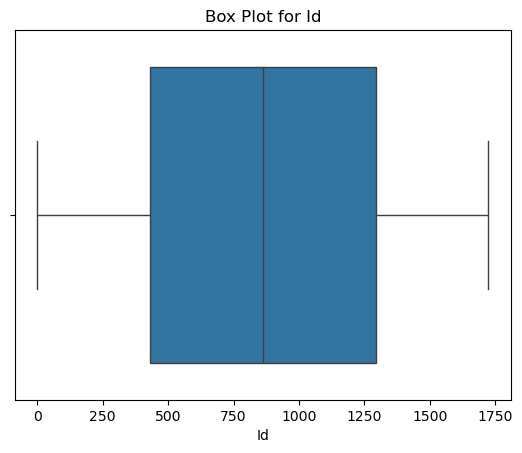

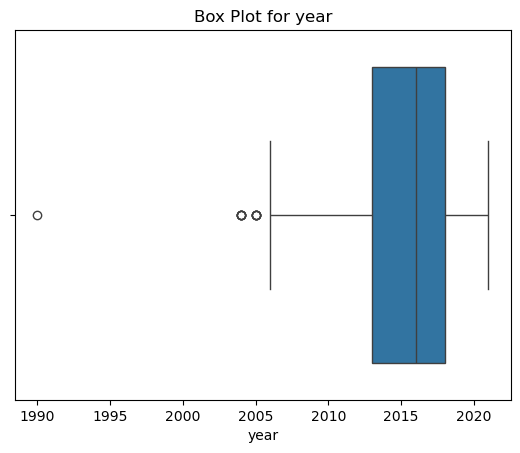

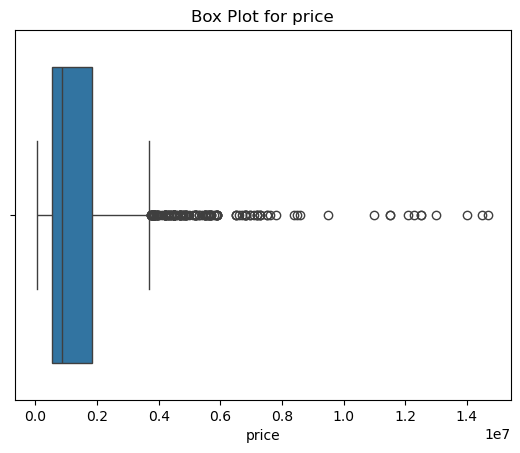

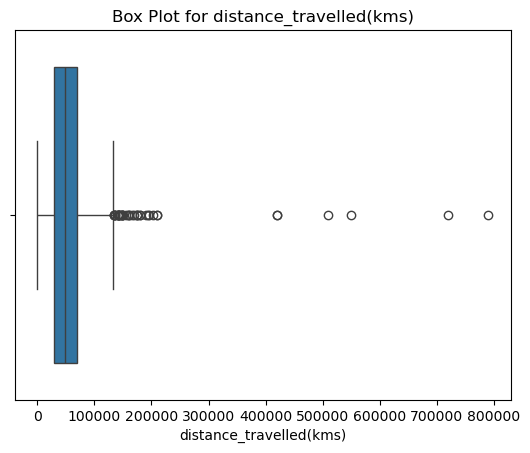

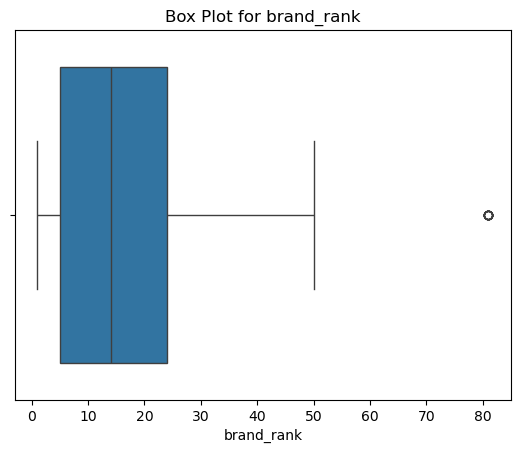

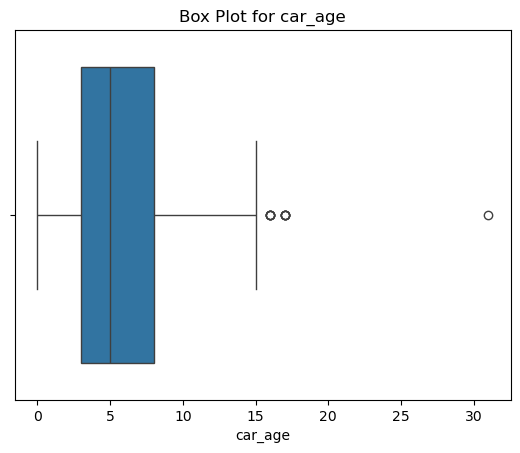

In [72]:
data_wangling_object.detect_outliers_boxplot(used_car_df)

In [73]:
def find_outliers_iqr(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = (series < lower_bound) | (series > upper_bound)
    return outliers

In [74]:
outliers_dict = {}
numerical_df = used_car_df.select_dtypes(include=['number'])
for column in numerical_df.columns:
    outliers_dict[column] = find_outliers_iqr(numerical_df[column])

In [78]:
features_with_outliers = [feature for feature, has_outliers in outliers_dict.items() if has_outliers.any()]
print("Features with Outliers:", features_with_outliers)

Features with Outliers: ['year', 'price', 'distance_travelled(kms)', 'brand_rank', 'car_age']


##### A.1.5 Encoding cartegorical data

- OneHotEncoder: Suitable for nominal categorical variables (no inherent order). It creates binary columns for each category.

In [83]:
# List of categorical features for OneHotEncoder
onehotencoder_features = ['brand', 'model_name', 'fuel_type', 'city']

x_one_hot_encode = data_wangling_object.one_hot_encode(onehotencoder_features)

- LabelEncoder: Suitable for ordinal categorical variables (with an inherent order) or when a single column with encoded values is preferred (e.g., for certain algorithms or when the number of categories is large).

In [87]:
# List of categorical features for LabelEncoder
labelencoder_features = ['full_model_name']

x_encoded = data_wangling_object.label_encode(x_one_hot_encode , labelencoder_features)

x_encoded

,Id,year,full_model_name,distance_travelled(kms),brand_rank,car_age,brand_BMW,brand_Bentley,brand_Chevrolet,brand_Datsun,...,city_Faridabad,city_Ghaziabad,city_Hyderabad,city_Lucknow,city_Mumbai,city_Navi Mumbai,city_Noida,city_Panchkula,city_Pune,city_Thane
0,0,2016,131,9680.0,7,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,2012,570,119120.0,11,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,2017,676,64593.0,1,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,2017,526,25000.0,2,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,2012,259,23800.0,14,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,1720,2015,221,38000.0,14,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1721,1721,2011,80,36000.0,44,10.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1722,1722,2008,391,142522.0,24,13.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1723,1723,1990,347,18581.0,24,31.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [89]:
clean_data = x_encoded.join(used_car_df['price'])

In [91]:
clean_data

,Id,year,full_model_name,distance_travelled(kms),brand_rank,car_age,brand_BMW,brand_Bentley,brand_Chevrolet,brand_Datsun,...,city_Ghaziabad,city_Hyderabad,city_Lucknow,city_Mumbai,city_Navi Mumbai,city_Noida,city_Panchkula,city_Pune,city_Thane,price
0,0,2016,131,9680.0,7,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,425000.0
1,1,2012,570,119120.0,11,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,325000.0
2,2,2017,676,64593.0,1,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2650000.0
3,3,2017,526,25000.0,2,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4195000.0
4,4,2012,259,23800.0,14,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,475000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,1720,2015,221,38000.0,14,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,290000.0
1721,1721,2011,80,36000.0,44,10.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7500000.0
1722,1722,2008,391,142522.0,24,13.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,185000.0
1723,1723,1990,347,18581.0,24,31.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,325000.0


#### Concludsion on data wangling : 

During the data wangling phase, the following steps were undertaken:

- No duplicate observations were identified in the dataset.
- Outliers were detected in several numerical features, including 'year', 'price', 'distance_travelled(kms)', 'brand_rank', and 'car_age'.
- Incorrect values in the 'car_age' feature (e.g., values equal to 0) were deemed invalid within the context of used cars and were accordingly converted to NaN.
- Categorical features were successfully encoded to prepare them for machine learning algorithms.

Note: No imputation of missing values or removal of outliers was performed at this stage to avoid data leakage and contamination. These operations will be addressed during the cross-validation and model training phases to ensure a robust and unbiased evaluation.

#### B. EXPLORATORY DATA ANALYSIS :

In [98]:
class ExploratoryInsights:
    '''
        This class is used to perform exploratory data analysis and has the following methods : 
        - infodata : gain information about the data set. 
        - sumarry_statistics : This methods provide descriptive summary statistics about the data set.
        - features_data_types : This function provides the data type for every columns in th dataframe.
        - dataframe_shape : This methods returns the shape of 
    '''
    def __init__(self , rawdata):
        self.rawdata = rawdata

    def infodata(self) :
        return self.rawdata.info()

    def sumarry_statistics(self):
        return self.rawdata.describe()

    def features_data_types(self):
        return self.rawdata.dtypes

    def dataframe_shape(self):
        return self.rawdata.shape

    def corre_heatmap(self):
        numerical_df = self.rawdata.select_dtypes(include=['number'])
        correlation_matrix = numerical_df.corr()
        # Set the size of the graph
        plt.figure(figsize=(14, 10))
        # Create a heatmap
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
        # Add title
        plt.title('Correlation Heatmap')
        plt.show()

##### B. Initializing the ExploratoryInsights :

In [101]:
exploredata_df = ExploratoryInsights(used_car_df)

##### B.1 DataFrame Overview :

In [105]:
exploredata_df.infodata()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1725 non-null   int64  
 1   year                     1725 non-null   int64  
 2   brand                    1725 non-null   object 
 3   full_model_name          1725 non-null   object 
 4   model_name               1725 non-null   object 
 5   price                    1725 non-null   float64
 6   distance_travelled(kms)  1725 non-null   float64
 7   fuel_type                1725 non-null   object 
 8   city                     1725 non-null   object 
 9   brand_rank               1725 non-null   int64  
 10  car_age                  1725 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 148.4+ KB


The dataset contains 1,725 records and 11 features, including a mix of numerical (int64, float64) and categorical (object) data types. Specifically:

- 6 numerical features: such as year, price, and distance_travelled(kms).
- 5 categorical features: including brand, model_name, and fuel_type, which has already been preprocessed to numerical.
- There are no missing values, and the dataset is well-structured and memory-efficient (~148.4 KB), making it ready for further analysis.

##### B.1.1 Statistical Summary

In [110]:
exploredata_df.sumarry_statistics()

,Id,year,price,distance_travelled(kms),brand_rank,car_age
count,1725.000000,1725.000000,1.725000e+03,1725.000000,1725.000000,1725.000000
mean,862.000000,2015.390725,1.494837e+06,53848.256232,15.731014,5.609275
std,498.108924,3.207504,1.671658e+06,44725.541963,12.951122,3.207504
min,0.000000,1990.000000,6.250000e+04,350.000000,1.000000,0.000000
25%,431.000000,2013.000000,5.450000e+05,29000.000000,5.000000,3.000000
50%,862.000000,2016.000000,8.750000e+05,49000.000000,14.000000,5.000000
75%,1293.000000,2018.000000,1.825000e+06,70500.000000,24.000000,8.000000
max,1724.000000,2021.000000,1.470000e+07,790000.000000,81.000000,31.000000


The dataset consists of 1,725 records across key numerical features:

- Year: Ranges from 1990 to 2021, with a mean year of 2015.39.
- Price: Varies significantly, from a minimum of ₹62,500 to a maximum of ₹14.7 million, with a mean price of ₹1.49 million.
- Distance Travelled: Ranges from 350 km to 790,000 km, with an average distance of 53,848 km.
- Brand Rank: The ranks range from 1 to 81, with a mean rank of 15.73.
- Car Age: Ranges from 0 to 31 years, with a mean age of 5.61 years.

This summary indicates diverse car types, age ranges, and price points, with a wide spread in several features, suggesting that further analysis will be crucial for better understanding relationships between them.

##### B.1.2 Dataset Dimensions

In [115]:
exploredata_df.dataframe_shape()

(1725, 11)

##### B.1.3 Feature Correlation Heatmap

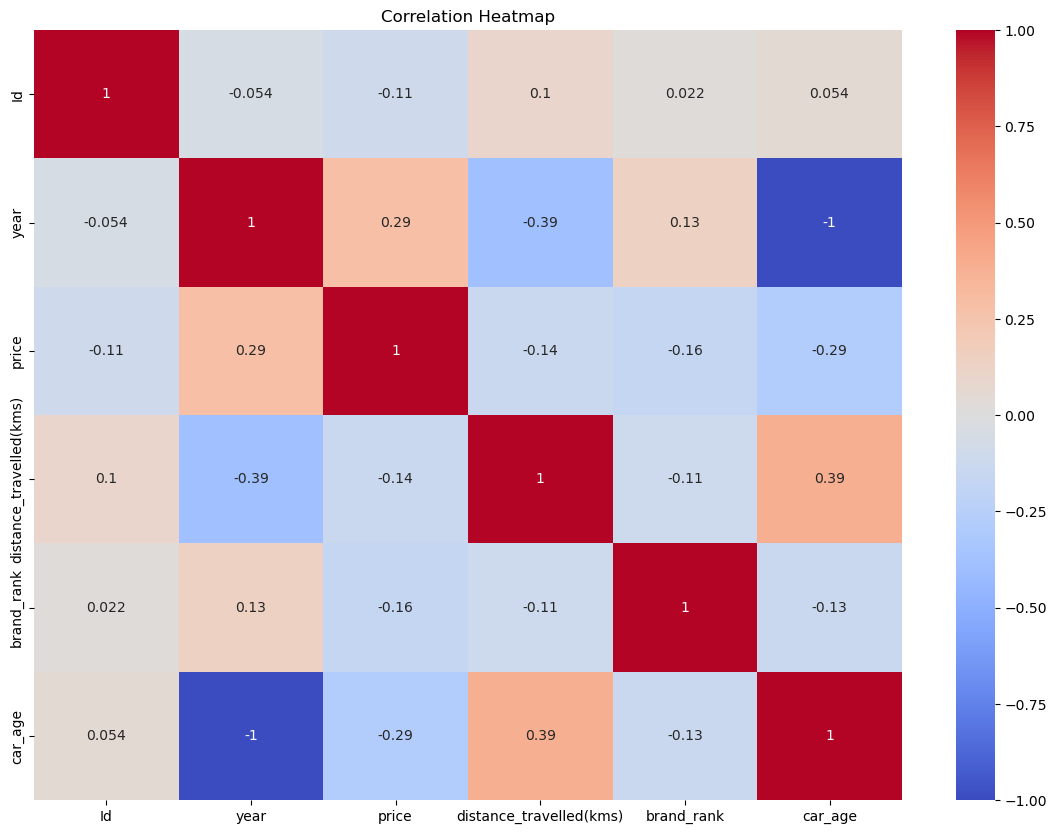

In [119]:
exploredata_df.corre_heatmap()

This is a correlation matrix heatmap showing the relationships between variables: id, year, price,distance_travelled(kms), brand_rank, and car_age. The color scale ranges from -1 (blue, strong negative correlation) to 1 (red, strong positive correlation), with 0 (white) indicating no correlation.

Key observations:

- id has no strong correlations with other variables (values close to 0).
- year and car_age are perfectly negatively correlated (-1), which makes sense since older cars have earlier years.
- price has a moderate positive correlation with year (0.29) and a moderate negative correlation with car_age (-0.29), suggesting newer cars (higher -  year, lower car_age) tend to be more expensive.
- distance_travelled(kms) has a moderate negative correlation with year (-0.39) and a moderate positive correlation with car_age (0.39), indicating older cars have typically traveled more.
- brand_rank shows weak correlations with other variables, with the strongest being a negative correlation with price (-0.16).
  
In summary, the matrix highlights expected relationships, like the inverse relationship between a car’s year and age, and how newer cars tend to be pricier with less mileage.

#### B.1.4 Frequency Distribution: 

In [124]:
numberical_columns = used_car_df.select_dtypes(include=['number'])

def plot_histograms_and_box_plots(numeri_col):
    num_cols = len(numeri_col.columns)

    # Set up subplots
    fig, axes = plt.subplots(nrows=2, ncols=num_cols, figsize=(20, 8))
    fig.suptitle('Histograms and Box Plots')

    # Plot histograms and box plots
    for i, col in enumerate(numeri_col.columns):
        # Histogram
        sns.histplot(numeri_col[col], bins=20, kde=True, ax=axes[0, i])
        axes[0, i].set_title(f'{col} - Histogram')

        # Box plot
        sns.boxplot(x=numeri_col[col], ax=axes[1, i])
        axes[1, i].set_title(f'{col} - Box Plot')

    # Adjust layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

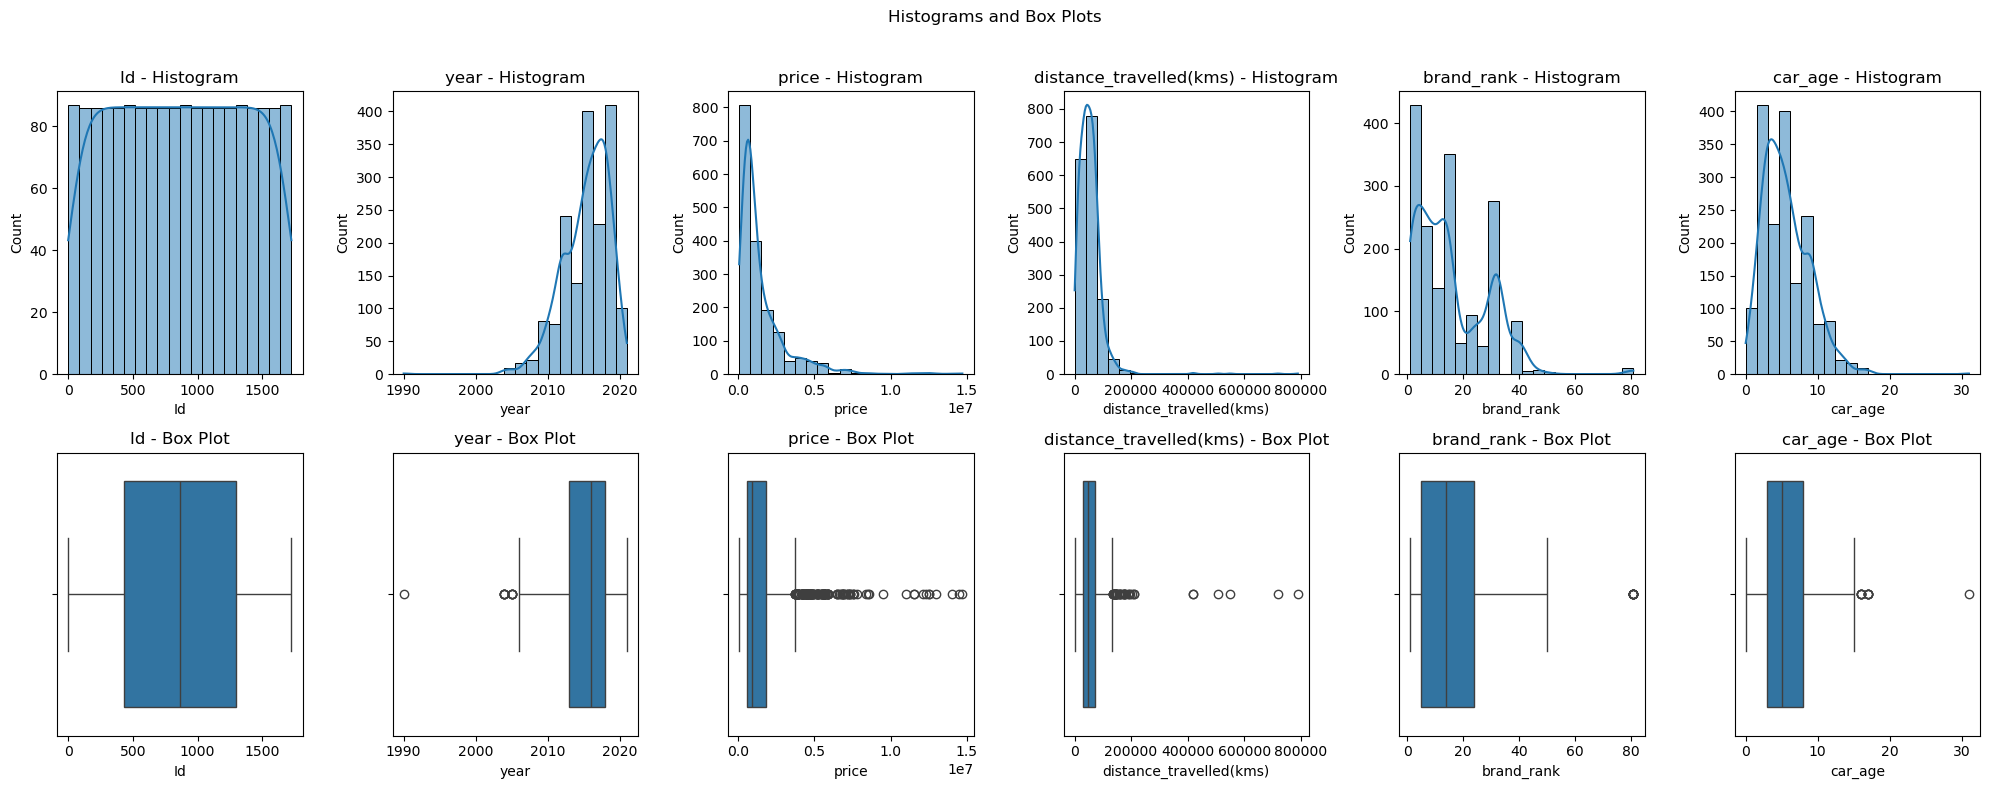

In [125]:
plot_histograms_and_box_plots(numberical_columns)

From the above chart : 
- id: Histogram shows a roughly uniform distribution between 0 and 1500; box plot confirms no significant outliers.
- year: Histogram indicates most data points are from 2010 onwards, peaking around 2020; box plot shows a few older outliers before 1990.
- price: Histogram is right-skewed, with most values below 0.5 (units unclear), peaking near 0; box plot highlights many high-price outliers up to 1.7.
- distance_travelled(kms): Histogram is right-skewed, with most values under 200,000 km; box plot shows outliers extending to 800,000 km.
- brand_rank: Histogram peaks around 0-10, with a long tail up to 60; box plot indicates a few high-rank outliers.
- car_age: Histogram is right-skewed, with most cars under 10 years old; box plot shows outliers up to 30 years.
- Overall, the data shows varied distributions, with price, distance, and car_age being right-skewed, while id is more uniform, and year and brand_rank have distinct peaks.

##### B.1.5 Evolution of price of used cars over time:

In [129]:
def plot_car_price_trend(df, save_plot=False):
    """
    Analyze and visualize the trend of car prices over the years from a DataFrame.
    Displays the plot inline in a Jupyter notebook and optionally saves it.
    
    Args:
        df (pd.DataFrame): DataFrame containing 'year' and 'price' columns.
        save_plot (bool): If True, saves the plot to 'car_price_trend.png'. Default is False.
    
    Returns:
        None: Displays the plot inline and optionally saves it.
    """
    try:
        # Ensure Matplotlib inline for Jupyter
        %matplotlib inline
        
        # Validate required columns
        if 'year' not in df.columns or 'price' not in df.columns:
            raise ValueError("DataFrame must contain 'year' and 'price' columns")
        
        # Clean data: Remove rows with missing or invalid values
        df_clean = df[['year', 'price']].copy()
        df_clean = df_clean.dropna()
        df_clean['year'] = pd.to_numeric(df_clean['year'], errors='coerce')
        df_clean['price'] = pd.to_numeric(df_clean['price'], errors='coerce')
        df_clean = df_clean.dropna()
        
        # Convert year to integer
        df_clean['year'] = df_clean['year'].astype(int)
        
        # Group by year and calculate mean price
        price_trend = df_clean.groupby('year')['price'].mean().reset_index()
        
        # Sort by year for proper plotting
        price_trend = price_trend.sort_values('year')
        
        # Create the plot
        plt.figure(figsize=(10, 6))
        plt.plot(price_trend['year'], price_trend['price'], marker='o', linestyle='-', color='b')
        
        # Customize the plot
        plt.title('Average Car Price Trend Over Years', fontsize=14)
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Average Price (INR)', fontsize=12)
        plt.grid(True)
        plt.xticks(price_trend['year'], rotation=45)
        
        # Format y-axis with abbreviated numbers (e.g., 1M for 1,000,000)
        def format_price(x, _):
            if x >= 1_000_000:
                return f'{x/1_000_000:.1f}M'
            elif x >= 1_000:
                return f'{x/1_000:.1f}K'
            return f'{x:.0f}'
        plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(format_price))
        
        # Adjust layout to prevent label cutoff
        plt.tight_layout()
        
        # Save the plot if requested
        if save_plot:
            plt.savefig('car_price_trend.png')
        
        # Display the plot
        plt.show()
        
    except Exception as e:
        print(f"Error processing data: {str(e)}")

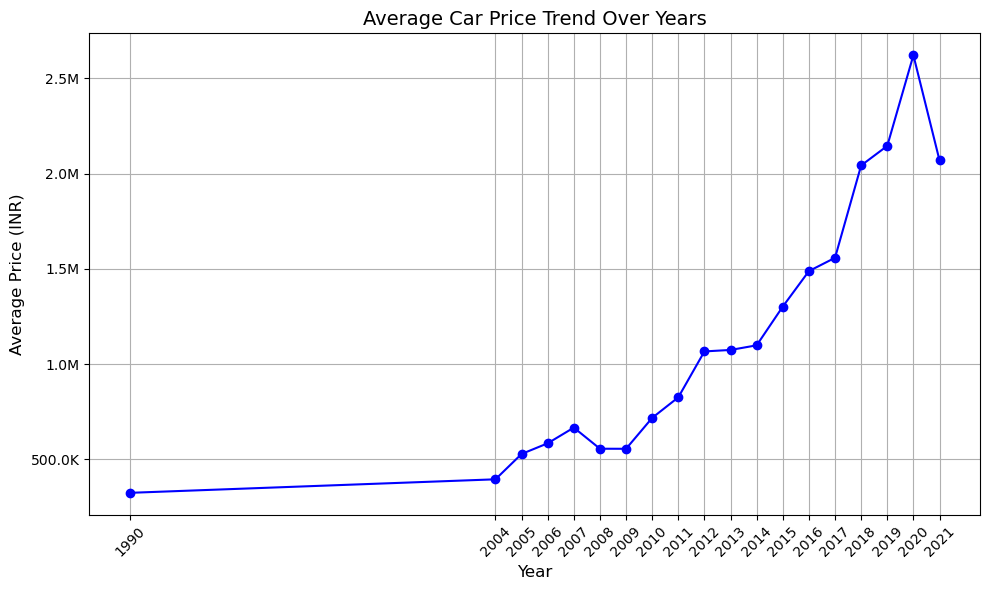

In [131]:
plot_car_price_trend(used_car_df)

##### B.1.6 Price Distribution by Fuel Type :

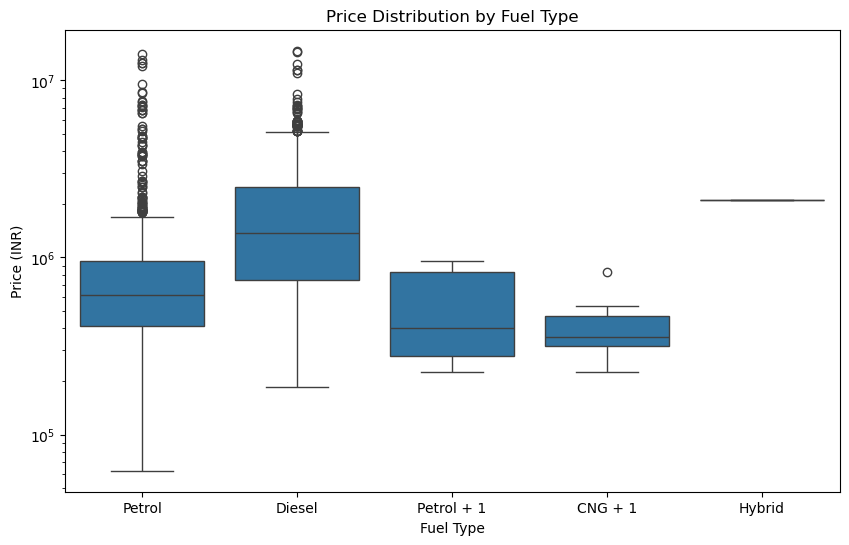

            count          mean           std        min        25%  \
fuel_type                                                             
CNG + 1       8.0  4.218750e+05  1.884512e+05   225000.0   317500.0   
Diesel      922.0  1.914885e+06  1.700958e+06   185000.0   750000.0   
Hybrid        1.0  2.100000e+06           NaN  2100000.0  2100000.0   
Petrol      788.0  1.020832e+06  1.511171e+06    62500.0   410000.0   
Petrol + 1    6.0  5.300000e+05  3.359613e+05   225000.0   276250.0   

                  50%        75%         max  
fuel_type                                     
CNG + 1      357500.0   467500.0    825000.0  
Diesel      1375000.0  2500000.0  14700000.0  
Hybrid      2100000.0  2100000.0   2100000.0  
Petrol       610000.0   950000.0  14000000.0  
Petrol + 1   397500.0   830000.0    950000.0  


In [136]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel_type', y='price', data=used_car_df)
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price (INR)')
plt.yscale('log')  # Log scale for better visibility due to price range
plt.show()

# Summary statistics
print(used_car_df.groupby('fuel_type')['price'].describe())

##### B.1.7 Price vs. Distance Travelled

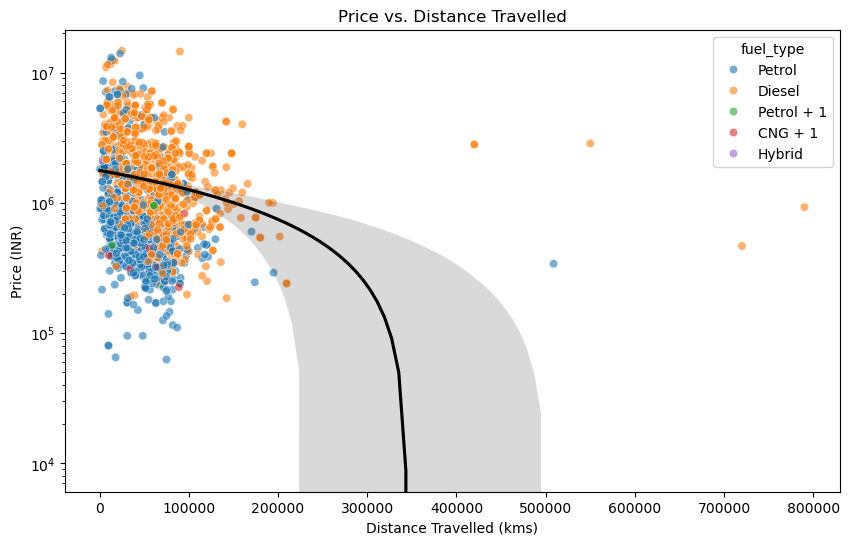

Correlation between price and distance travelled: -0.13735123138914235


In [142]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_travelled(kms)', y='price', hue='fuel_type', data=used_car_df, alpha=0.6)
sns.regplot(x='distance_travelled(kms)', y='price', data=used_car_df, scatter=False, color='black')
plt.title('Price vs. Distance Travelled')
plt.xlabel('Distance Travelled (kms)')
plt.ylabel('Price (INR)')
plt.yscale('log')  # Log scale for price
plt.show()

# Correlation
print("Correlation between price and distance travelled:", 
      used_car_df['price'].corr(used_car_df['distance_travelled(kms)']))

##### B.1.8 Price Trends by City

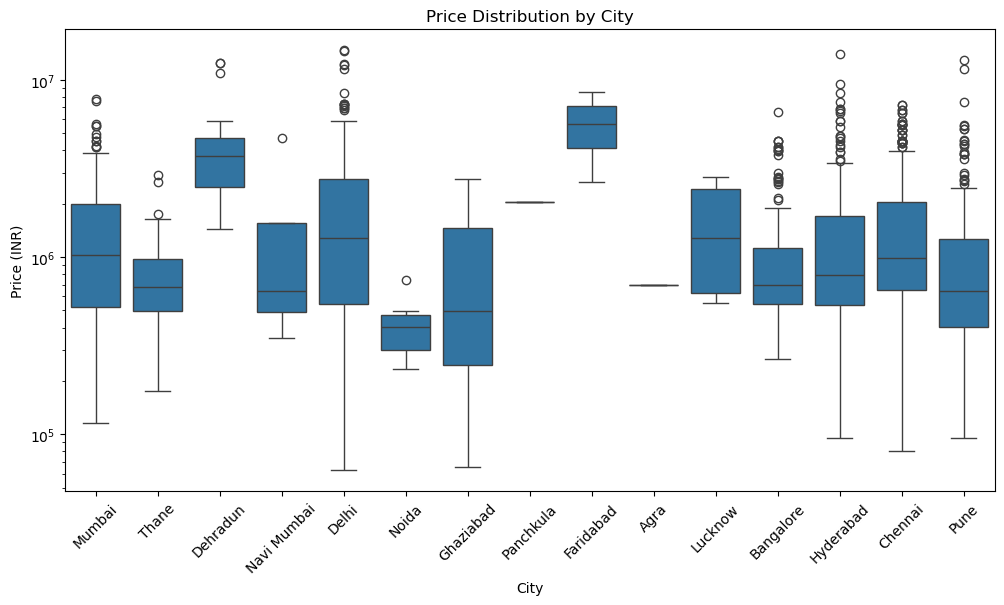

City statistics:
                     price  count
city                            
Faridabad    5.625000e+06      2
Dehradun     3.863393e+06     56
Delhi        2.218409e+06    187
Panchkula    2.050000e+06      1
Navi Mumbai  1.545600e+06      5
Lucknow      1.529167e+06      6
Chennai      1.501099e+06    493
Mumbai       1.485085e+06    165
Hyderabad    1.438980e+06    245
Pune         1.132441e+06    247
Bangalore    9.949798e+05    247
Ghaziabad    8.679000e+05     10
Thane        8.306667e+05     48
Agra         6.950000e+05      1
Noida        4.040833e+05     12


In [146]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='city', y='price', data=used_car_df)
plt.title('Price Distribution by City')
plt.xlabel('City')
plt.ylabel('Price (INR)')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

# Average price and car count by city
city_stats = used_car_df.groupby('city').agg({'price': 'mean', 'Id': 'count'}).rename(columns={'Id': 'count'})
print("City statistics:\n", city_stats.sort_values('price', ascending=False))

##### B.1.9 Fuel Type Distribution Over Time

<Figure size 1200x600 with 0 Axes>

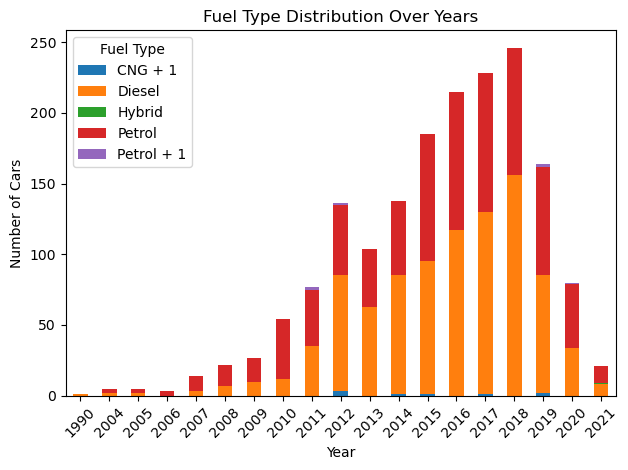

In [202]:
fuel_by_year = used_car_df.groupby(['year', 'fuel_type']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
fuel_by_year.plot(kind='bar', stacked=True)
plt.title('Fuel Type Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.legend(title='Fuel Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### C. Model Building (TAKING INTO CONSIDERATION DATA LEAKAGE -> PREPROCESS DATA DURING THE TRAINING PHASE TO PREVENT DATA CONTAMINATION)

In [207]:
clean_data

,Id,year,full_model_name,distance_travelled(kms),brand_rank,car_age,brand_BMW,brand_Bentley,brand_Chevrolet,brand_Datsun,...,city_Ghaziabad,city_Hyderabad,city_Lucknow,city_Mumbai,city_Navi Mumbai,city_Noida,city_Panchkula,city_Pune,city_Thane,price
0,0,2016,131,9680.0,7,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,425000.0
1,1,2012,570,119120.0,11,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,325000.0
2,2,2017,676,64593.0,1,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2650000.0
3,3,2017,526,25000.0,2,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4195000.0
4,4,2012,259,23800.0,14,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,475000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,1720,2015,221,38000.0,14,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,290000.0
1721,1721,2011,80,36000.0,44,10.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7500000.0
1722,1722,2008,391,142522.0,24,13.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,185000.0
1723,1723,1990,347,18581.0,24,31.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,325000.0


In [209]:
clean_data.shape

(1725, 223)

In [335]:
clean_data.columns

Index(['Id', 'year', 'full_model_name', 'distance_travelled(kms)',
       'brand_rank', 'car_age', 'brand_BMW', 'brand_Bentley',
       'brand_Chevrolet', 'brand_Datsun',
       ...
       'city_Ghaziabad', 'city_Hyderabad', 'city_Lucknow', 'city_Mumbai',
       'city_Navi Mumbai', 'city_Noida', 'city_Panchkula', 'city_Pune',
       'city_Thane', 'price'],
      dtype='object', length=223)

In [392]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [378]:
# Target variable
y = clean_data['price']  # Assuming 'price' is the target variable

# Features
X = clean_data.drop(columns=['price', 'Id'])  # Drop 'price', 'Id' and 'full_model_name' columns

In [380]:
# Data Splitting: Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [382]:
# Define Outlier Capping (using IQR to cap outliers)
class OutlierCapping:
    def __init__(self, cap_factor=1.5):
        self.cap_factor = cap_factor

    def fit(self, X, y=None):
        self.lower_cap = X.quantile(0.25) - self.cap_factor * (X.quantile(0.75) - X.quantile(0.25))
        self.upper_cap = X.quantile(0.75) + self.cap_factor * (X.quantile(0.75) - X.quantile(0.25))
        return self

    def transform(self, X):
        return X.clip(lower=self.lower_cap, upper=self.upper_cap, axis=1)

In [384]:
# Define pipeline creation function
def create_pipeline(model_type):
    # Numerical preprocessing pipeline
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),  # Impute missing values
        ('scaler', StandardScaler())                   # Scale features
    ])
    
    # Outlier Capping
    outlier_capping = OutlierCapping(cap_factor=1.5)
    
    # Feature selection
    feature_selector = SelectKBest(score_func=f_regression)
    
    # Model selection based on model_type
    if model_type == 'rf':
        model = RandomForestRegressor(random_state=42)
    elif model_type == 'gb':
        model = GradientBoostingRegressor(random_state=42)
    else:
        raise ValueError("Model type not supported")
    
    # Build complete pipeline
    pipeline = Pipeline(steps=[
        ('outlier_capping', outlier_capping),
        ('preprocessor', ColumnTransformer(transformers=[('num', numerical_transformer, X.columns)])),
        ('feature_selection', feature_selector),
        ('model', model)
    ])
    
    return pipeline

In [386]:
# Train and evaluate function
def train_and_evaluate(model_type, param_grid):
    print(f"\n--- Training {model_type.upper()} Model ---")
    
    # Build pipeline
    pipeline = create_pipeline(model_type)
    
    # Grid Search with KFold Cross-validation
    grid_search = GridSearchCV(pipeline, param_grid, cv=KFold(n_splits=5, shuffle=True, random_state=42),
                               scoring='neg_root_mean_squared_error', n_jobs=-1)
    
    # Fit the grid search
    grid_search.fit(X_train, y_train)
    
    # Get best model
    best_model = grid_search.best_estimator_
    
    # Predict on test set
    y_pred = best_model.predict(X_test)
    
    # Evaluate performance
    print("Best Parameters:", grid_search.best_params_)
    print("Test Set Performance:")
    print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"R²: {r2_score(y_test, y_pred):.4f}")
    
    # Plot predicted vs actual
    plt.figure(figsize=(8, 5))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'Predicted vs Actual Price - {model_type.upper()}')
    plt.tight_layout()
    plt.show()

    # Feature importance
    model = best_model.named_steps['model']
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
        feature_names = X.columns[best_model.named_steps['feature_selection'].get_support()]
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importance
        }).sort_values(by='Importance', ascending=False)
        print("\nTop 5 Most Important Features:")
        print(importance_df.head())

    # Save model
    joblib.dump(best_model, f'best_model_{model_type}.pkl')
    print(f"Saved best {model_type.upper()} model as best_model_{model_type}.pkl")

In [388]:
# Example param_grid for Random Forest
param_grid_rf = {
    'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()],
    'feature_selection__k': [5, 10, 20],
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 20],
}

# Example param_grid for Gradient Boosting
param_grid_gb = {
    'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()],
    'feature_selection__k': [5, 10, 20],
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.01, 0.05],
}


--- Training RF Model ---
Best Parameters: {'feature_selection__k': 10, 'model__max_depth': 20, 'model__n_estimators': 200, 'preprocessor__num__scaler': MinMaxScaler()}
Test Set Performance:
RMSE: 933807.40
MAE: 337009.37
R²: 0.7402


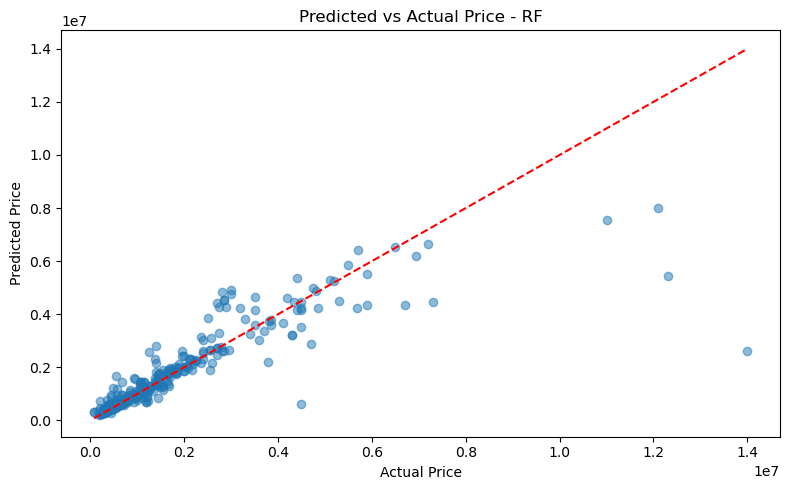


Top 5 Most Important Features:
                   Feature  Importance
1          full_model_name    0.423333
3               brand_rank    0.225203
2  distance_travelled(kms)    0.110927
0                     year    0.106381
4                  car_age    0.101749
Saved best RF model as best_model_rf.pkl

--- Training GB Model ---
Best Parameters: {'feature_selection__k': 10, 'model__learning_rate': 0.05, 'model__n_estimators': 200, 'preprocessor__num__scaler': MinMaxScaler()}
Test Set Performance:
RMSE: 997726.17
MAE: 441468.23
R²: 0.7035


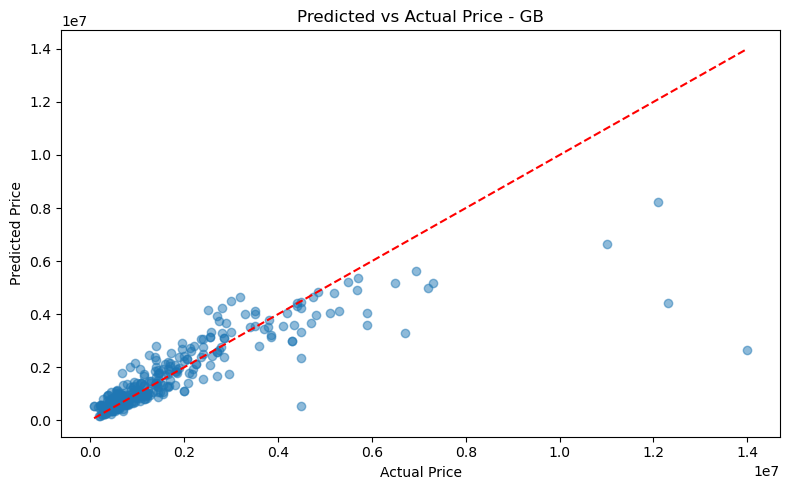


Top 5 Most Important Features:
                   Feature  Importance
1          full_model_name    0.460767
3               brand_rank    0.248329
0                     year    0.095288
2  distance_travelled(kms)    0.085831
4                  car_age    0.077791
Saved best GB model as best_model_gb.pkl


In [394]:
# Train and evaluate models
train_and_evaluate('rf', param_grid_rf)
train_and_evaluate('gb', param_grid_gb)